**LETS GROW MORE INTERNSHIP - AUGUST 2023**\
**TASK - STOCK PREDICTION**\
**NINAD NILESH SUGANDHI**

Importing Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0) 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, optimizers
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import math

**Loading Dataframe**


In [2]:
df = pd.read_csv("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\LGM PROJECTS\\stockpriceTATAGLOBAL.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


**Data Preprocessing**

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [5]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
df.tail(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2025,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78
2026,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
2027,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
df.describe

<bound method NDFrame.describe of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4              

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [10]:
df.info

<bound method DataFrame.info of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                

In [11]:
df.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [13]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [14]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [15]:
df.shape

(2035, 8)

In [16]:
df.size

16280

In [17]:
df.values

array([['2018-09-28', 234.05, 235.95, ..., 233.75, 3069914, 7162.35],
       ['2018-09-27', 234.55, 236.8, ..., 233.25, 5082859, 11859.95],
       ['2018-09-26', 240.0, 240.0, ..., 234.25, 2240909, 5248.6],
       ...,
       ['2010-07-23', 121.8, 121.95, ..., 120.65, 281312, 340.31],
       ['2010-07-22', 120.3, 122.0, ..., 120.9, 293312, 355.17],
       ['2010-07-21', 122.1, 123.0, ..., 121.55, 658666, 803.56]],
      dtype=object)

In [18]:
df = df[['Date','Open','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('Date',drop=True,inplace=True) # Setting date column as index
df.head(10)

C:\Users\NINAD SUGANDHI\AppData\Local\Temp\ipykernel_3796\2611033844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype


,Open,Close
Date,,
2018-09-28,234.05,233.75
2018-09-27,234.55,233.25
2018-09-26,240.00,234.25
2018-09-25,233.30,236.10
2018-09-24,233.55,233.30
2018-09-21,235.00,234.60
2018-09-19,235.95,234.90
2018-09-18,237.90,235.05
2018-09-17,233.15,236.60


**Data Visualization**

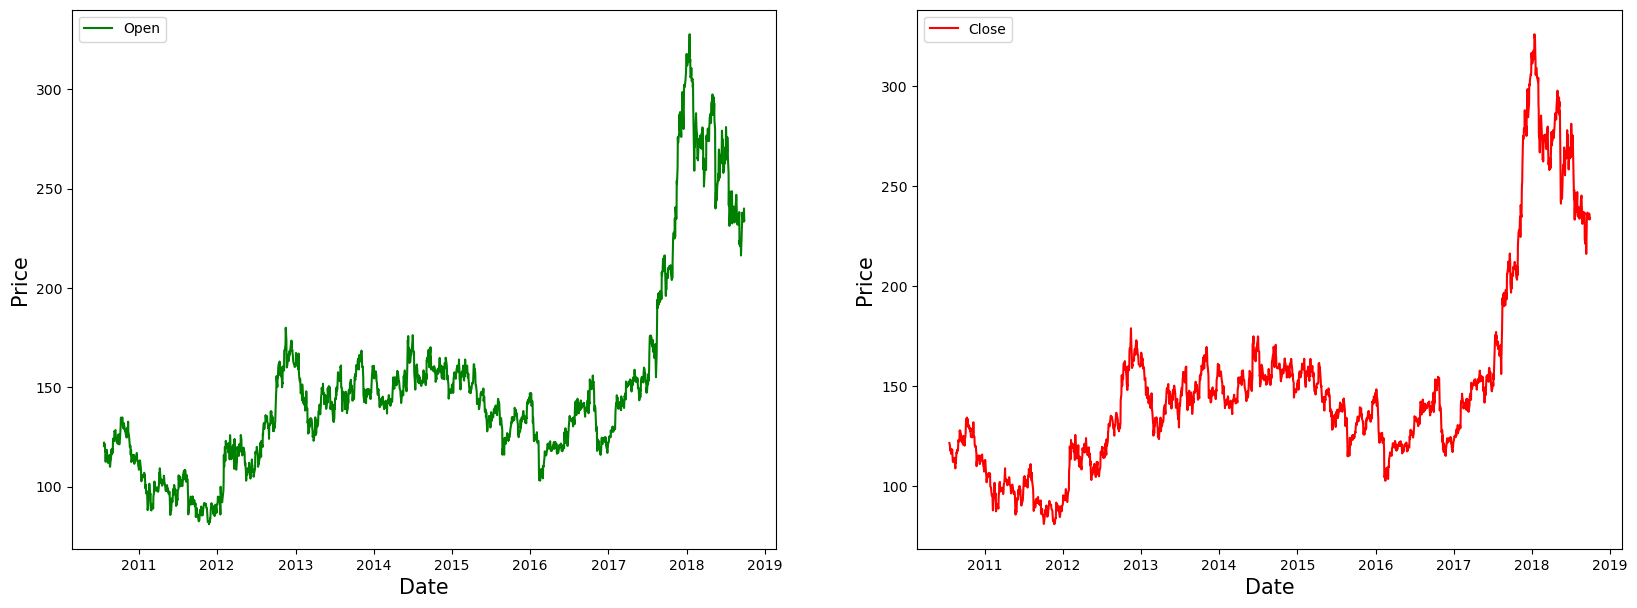

In [19]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

<Axes: xlabel='Date'>

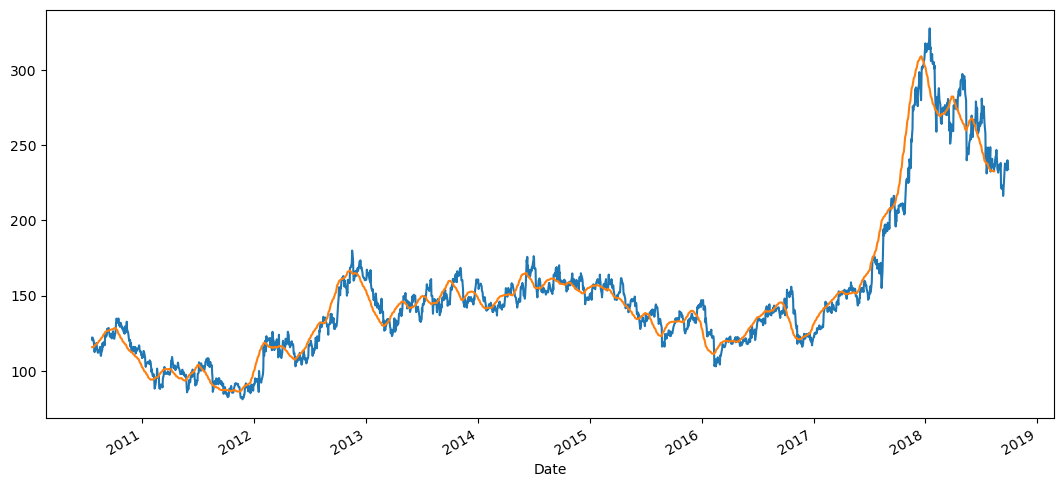

In [20]:
df['Open'].plot(figsize=(13,6))
df.rolling(window=30).mean()['Close'].plot()

<Axes: xlabel='Date'>

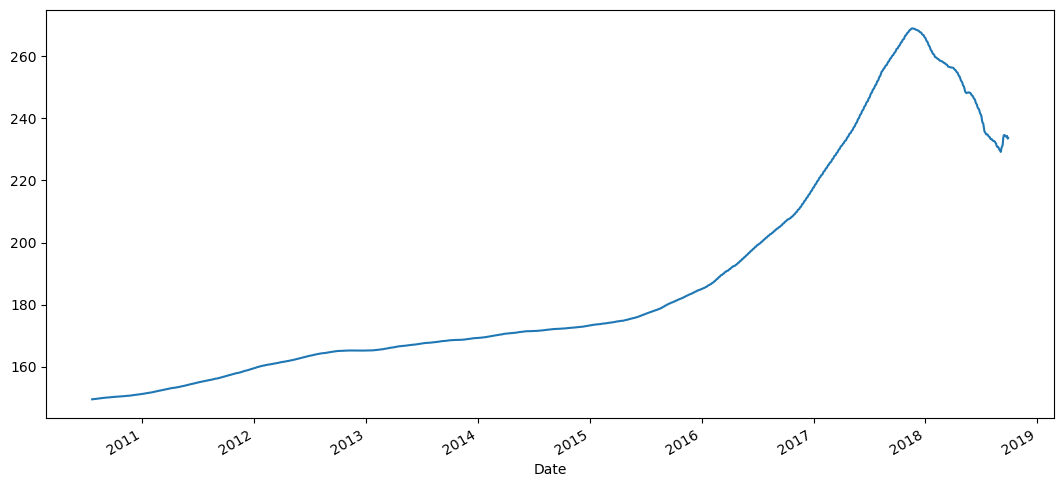

In [21]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(13,6))

**Splitting Data to train and test the LSTM model**

In [22]:
training_size = int(len(df) * 0.75)
train_data, test_data = df[0:training_size], df[training_size:]

# Preprocess the data
scaler = MinMaxScaler()
data1 = scaler.fit_transform(df)

In [23]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

X_train, y_train = create_sequence(train_data)
X_test, y_test = create_sequence(test_data)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1476, 50, 2), (1476, 2), (459, 50, 2), (459, 2))

**Building LSTM Model**

In [24]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10600     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 10702 (41.80 KB)
Trainable params: 10702 (41.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Training, evaluating and predicting using different datasets**

In [25]:
# Train the model
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/50
37/37 [==============================] - 5s 47ms/step - loss: 10621.3848 - val_loss: 5281.4360
Epoch 2/50
37/37 [==============================] - 1s 32ms/step - loss: 9027.9160 - val_loss: 4345.3066
Epoch 3/50
37/37 [==============================] - 1s 32ms/step - loss: 5460.6499 - val_loss: 3303.9521
Epoch 4/50
37/37 [==============================] - 1s 32ms/step - loss: 4004.1907 - val_loss: 2371.9963
Epoch 5/50
37/37 [==============================] - 1s 33ms/step - loss: 2882.3779 - val_loss: 1704.8304
Epoch 6/50
37/37 [==============================] - 1s 32ms/step - loss: 2081.8074 - val_loss: 1216.2932
Epoch 7/50
37/37 [==============================] - 1s 32ms/step - loss: 1502.5789 - val_loss: 867.0948
Epoch 8/50
37/37 [==============================] - 1s 31ms/step - loss: 1086.8367 - val_loss: 617.8743
Epoch 9/50
37/37 [==============================] - 1s 34ms/step - loss: 789.9714 - val_loss: 446.4547
Epoch 10/50
37/37 [==============================] - 1s 32

In [26]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# After getting predictions, scale them back using the saved min_ and scale_
train_inverse_predict = scaler.inverse_transform(train_predict)
test_inverse_predict = scaler.inverse_transform(test_predict)

print(train_predict[:5])
print(test_predict[:5])
print(train_inverse_predict[:5])
print(test_inverse_predict[:5])

15/15 [==============================] - 0s 14ms/step
[[230.9077  231.10808]
 [233.36725 232.87642]
 [234.44225 234.0243 ]
 [235.06306 235.42981]
 [236.60376 236.69528]]
[[109.997536 110.13533 ]
 [109.55234  109.489235]
 [109.85219  109.372505]
 [108.17326  108.51129 ]
 [108.437325 108.298546]]
[[57022.938 56656.207]
 [57629.465 57089.098]
 [57894.56  57370.098]
 [58047.652 57714.168]
 [58427.586 58023.953]]
[[27206.492 27042.08 ]
 [27096.707 26883.916]
 [27170.65  26855.34 ]
 [26756.627 26644.516]
 [26821.744 26592.436]]


In [27]:
df_merge = pd.concat([df.iloc[-459:].copy(), pd.DataFrame(test_inverse_predict,columns=['Open_predicted','Close_predicted'], index=df.iloc[-459:].index)], axis=1)

In [28]:
df_merge[['Open','Close']] = scaler.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,Open_predicted,Close_predicted
Date,,,,
2012-05-18,26171.38,25919.59,27206.492188,27042.080078
2012-05-17,26948.17,26360.23,27096.707031,26883.916016
2012-05-16,25641.19,26482.63,27170.650391,26855.339844
2012-05-15,25480.90,25748.23,26756.626953,26644.515625
2012-05-14,26713.90,25307.59,26821.744141,26592.435547


**Visualizing actual vs predicted for open and close price**

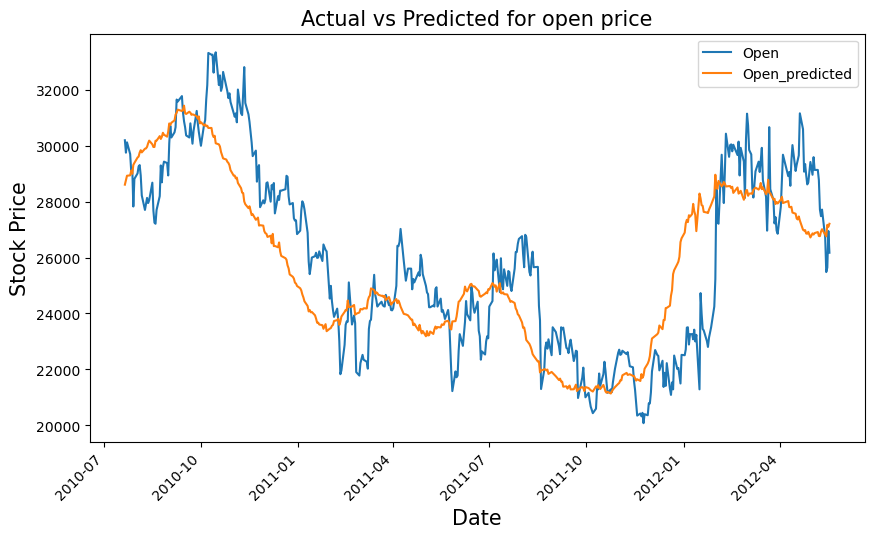

In [29]:
df_merge[['Open','Open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

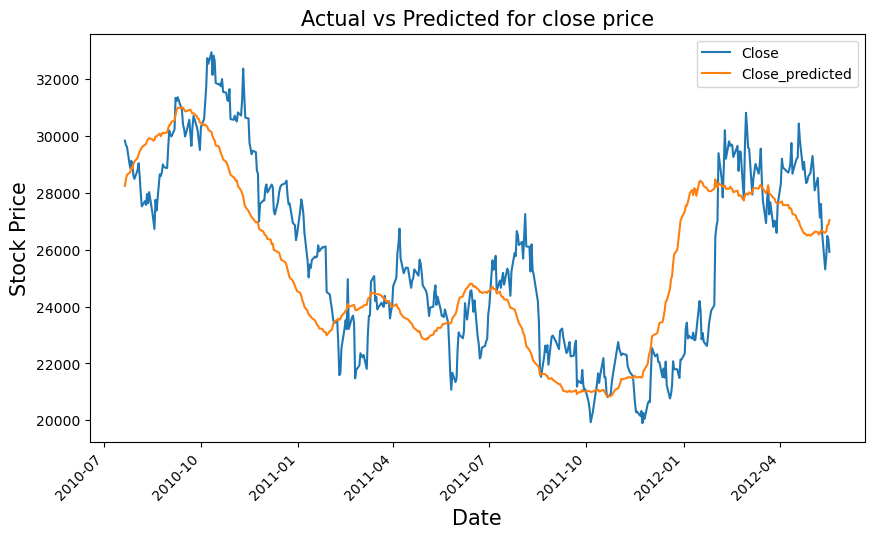

In [30]:
df_merge[['Close','Close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

**Visualization of price prediction found using LSTM**

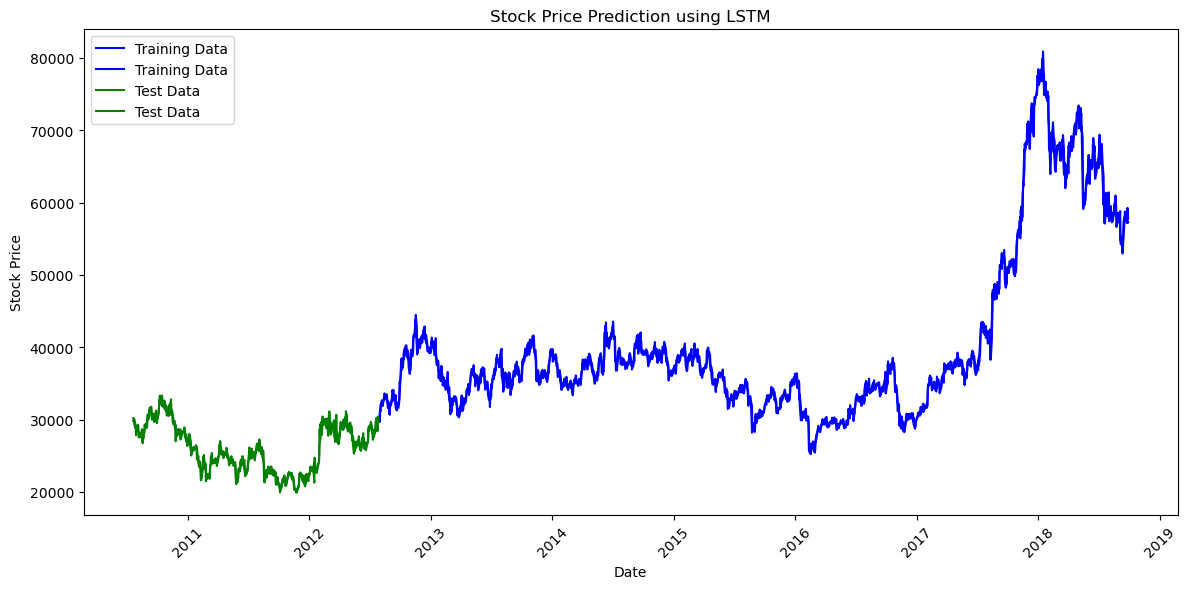

In [31]:
time_step = 100
plt.figure(figsize=(12, 6))
plt.plot(df.index[:len(train_data)], scaler.inverse_transform(train_data), label='Training Data', color='blue')
plt.plot(df.index[training_size:], scaler.inverse_transform(test_data), label='Test Data', color='green')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Displaying Mean Squared Error, Root Mean Squared Error and Mean Absolute Error**

In [32]:
mse = mean_squared_error(y_test[:, 0], test_inverse_predict[:, 0])
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test[:, 0], test_inverse_predict[:, 0])

print(f"MSE (Original Scale): {mse:.4f}")
print(f"RMSE (Original Scale): {rmse:.4f}")
print(f"MAE (Original Scale): {mae:.4f}")

MSE (Original Scale): 666265722.8813
RMSE (Original Scale): 25812.1236
MAE (Original Scale): 25650.8968
